In [1]:
!pip install matplotlib

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
import os

In [3]:
dir="./UTKFace"

files=os.listdir(dir)

In [4]:
!pip install opencv-python

In [6]:
import cv2 as cv
ages=[]
genders=[]
images=[]

for fil in files:
    age=int(fil.split('_')[0])
    gender=int(fil.split('_')[1])
    ages.append(age)
    genders.append(gender)
    total=dir+'/'+fil
    image=cv.imread(total)
    image=cv.cvtColor(image,cv.COLOR_BGR2RGB)

    image=cv.resize(image,(48,48))
    images.append(image)

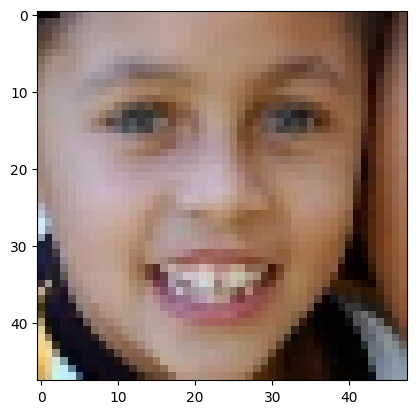

In [7]:
plt.imshow(images[100])

In [8]:
print(ages[100])

10


In [9]:
print(genders[100])

0


Age:80
Gender: Female


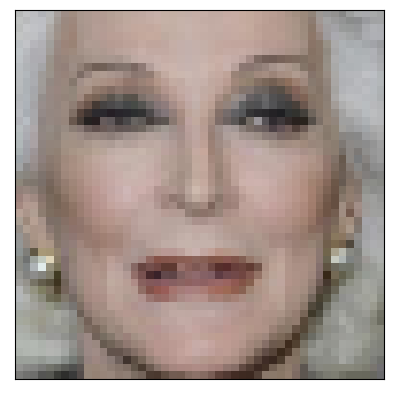

Age:1
Gender: Female


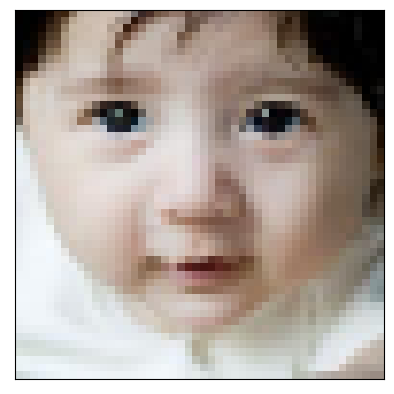

Age:24
Gender: Male


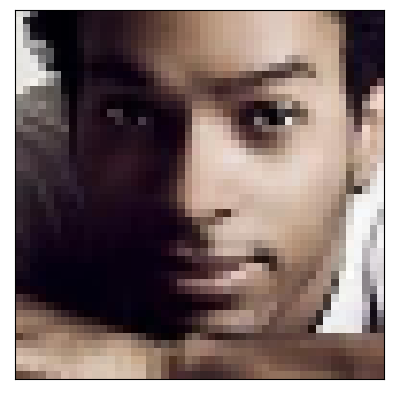

Age:52
Gender: Male


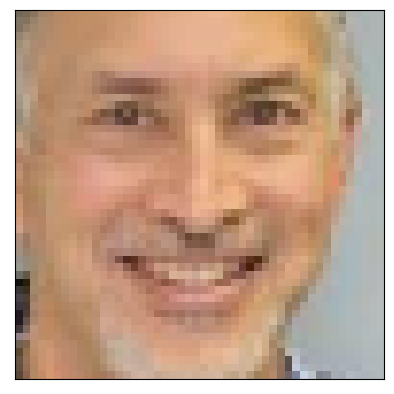

Age:11
Gender: Male


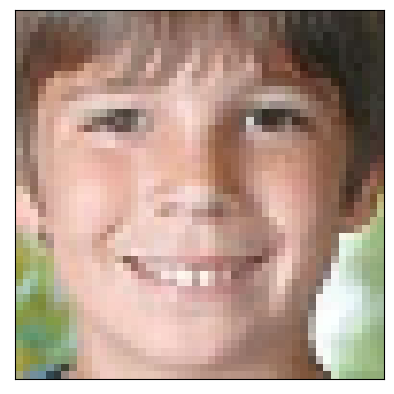

In [10]:
def showdemo(n):
    for i in np.random.randint(0,len(images),n):
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])

        print(f"Age:{ages[i]}")
        v=genders[i]
        if(v==1):
            print("Gender: Female")
        else: 
            print("Gender: Male")


        plt.show()  

showdemo(5)

In [11]:
images_arr=np.array(images)

ages_arr=np.array(ages)

gender_arr=np.array(genders)

In [12]:
np.save(dir+'images.npy',images_arr)
np.save(dir+'ages.npy',ages_arr)

np.save(dir+'genders.npy',gender_arr)

In [13]:
values,counts=np.unique(gender_arr,return_counts=True)

In [14]:
counts

array([12389, 11312], dtype=int64)

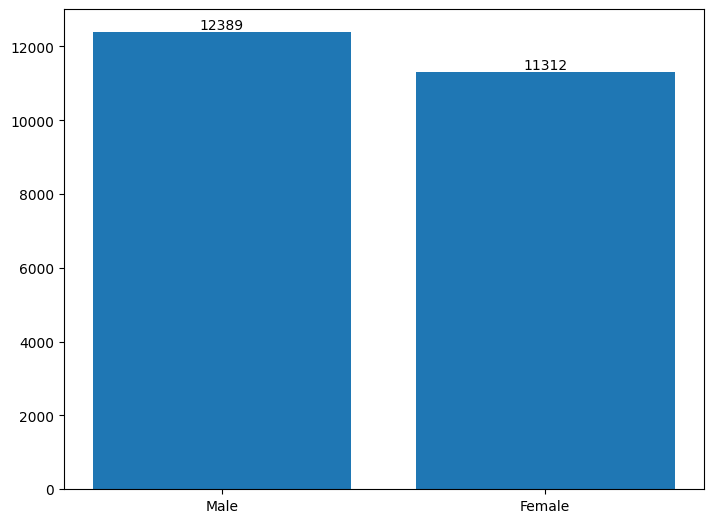

In [15]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
value=counts
ax.bar(gender,value)
for i in range(len(gender)):
    ax.text(i,value[i]+1,str(value[i]),ha='center',va='bottom')
plt.show()

In [16]:
values,counts=np.unique(ages_arr,return_counts=True)
print(values)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


In [17]:
val=values.tolist()
count=counts.tolist()

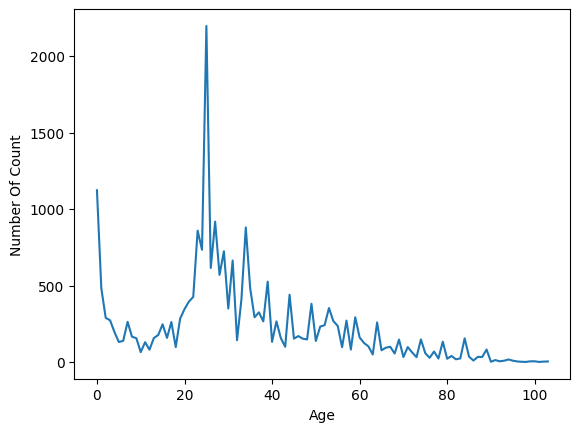

In [18]:
plt.plot(count)
plt.xlabel("Age")
plt.ylabel("Number Of Count")
plt.show()

In [19]:
images_arr1=images_arr/255.0

In [20]:
labels=[]
i=0

while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)

    i=i+1

In [21]:
labels_arr=np.array(labels)

In [22]:
!pip install scikit-learn

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(images_arr1,labels_arr,test_size=0.25)

In [24]:
Y_train[0:5]

array([[32,  0],
       [26,  1],
       [ 4,  1],
       [ 4,  0],
       [ 1,  0]])

In [25]:
Y_train2=(Y_train[:,1],Y_train[:,0])
Y_test2=(Y_test[:,1],Y_test[:,0])

In [26]:
print(Y_train2[0][0:5])
print(Y_train2[1][0:5])

[0 1 1 0 0]
[32 26  4  4  1]


## Defining The Model

In [46]:
def Conventional(input_tensor,filters):
    x=Conv2D(filters=filters,padding="same",kernel_size=(3,3),strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Activation('relu')(x)
    x=Dropout(0.1)(x)
    return x

In [49]:
def models(input_shape):
    input = Input(shape=input_shape)
    
    conv_1 = Conventional(input, 32)
    max_1 = MaxPool2D(pool_size=(2, 2))(conv_1)
    
    conv_2 = Conventional(max_1, 64)
    max_2 = MaxPool2D(pool_size=(2, 2))(conv_2)
    
    conv_3 = Conventional(max_2, 128)
    max_3 = MaxPool2D(pool_size=(2, 2))(conv_3)
    
    conv_4 = Conventional(max_3, 264)
    max_4 = MaxPool2D(pool_size=(2, 2))(conv_4)
    
    flatten = Flatten()(max_4)
    
  
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)
    
    dropout_1 = Dropout(0.2)(dense_1)
    dropout_2 = Dropout(0.2)(dense_2)
    
   
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(dropout_1)  
    output_2 = Dense(1, activation='linear', name='age_out')(dropout_2)  
    
    
    model = Model(inputs=input, outputs=[output_1, output_2])
    
    
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])
    
    return model

In [50]:
model_instance=models((48,48,3))

In [51]:
model_instance.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 48, 48, 32)   896         ['input_3[0][0]']                
                                                                                                  
 activation_8 (Activation)      (None, 48, 48, 32)   0           ['conv2d_8[0][0]']               
                                                                                                  
 dropout_12 (Dropout)           (None, 48, 48, 32)   0           ['activation_8[0][0]']           
                                                                                            

## Initialization The Model

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint
flir='Age_Sex_detection.h5'
checkpoint=ModelCheckpoint(flir,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=20,verbose=1,restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running The Model

In [53]:
History=model_instance.fit(X_train,Y_train2,batch_size=64,validation_data=(X_test,Y_test2),epochs=150,callbacks=callback_list)

Epoch 1/150
278/278 [==============================] - ETA: 0s - loss: 17.2755 - sex_out_loss: 0.6971 - age_out_loss: 16.3915 - sex_out_accuracy: 0.5459 - age_out_accuracy: 0.0475
Epoch 1: val_loss improved from inf to 20.11648, saving model to Age_Sex_detection.h5
278/278 [==============================] - 61s 208ms/step - loss: 17.2755 - sex_out_loss: 0.6971 - age_out_loss: 16.3915 - sex_out_accuracy: 0.5459 - age_out_accuracy: 0.0475 - val_loss: 20.1165 - val_sex_out_loss: 0.6897 - val_age_out_loss: 19.2709 - val_sex_out_accuracy: 0.5219 - val_age_out_accuracy: 0.0466
Epoch 2/150
278/278 [==============================] - ETA: 0s - loss: 14.4309 - sex_out_loss: 0.6486 - age_out_loss: 13.6112 - sex_out_accuracy: 0.6119 - age_out_accuracy: 0.0473
Epoch 2: val_loss improved from 20.11648 to 13.92152, saving model to Age_Sex_detection.h5
278/278 [==============================] - 48s 174ms/step - loss: 14.4309 - sex_out_loss: 0.6486 - age_out_loss: 13.6112 - sex_out_accuracy: 0.6119 - a

In [54]:
model_instance.evaluate(X_test,Y_test2)

186/186 [==============================] - 4s 19ms/step - loss: 7.3951 - sex_out_loss: 0.2630 - age_out_loss: 6.5257 - sex_out_accuracy: 0.8858 - age_out_accuracy: 0.0466


[7.395142078399658,
 0.2629721760749817,
 6.525749206542969,
 0.8857576847076416,
 0.046574417501688004]

In [55]:
pred=model_instance.predict(X_test)

186/186 [==============================] - 4s 19ms/step


In [56]:
pred[1]

array([[22.473404],
       [34.57836 ],
       [33.67674 ],
       ...,
       [64.14445 ],
       [71.12465 ],
       [39.887444]], dtype=float32)

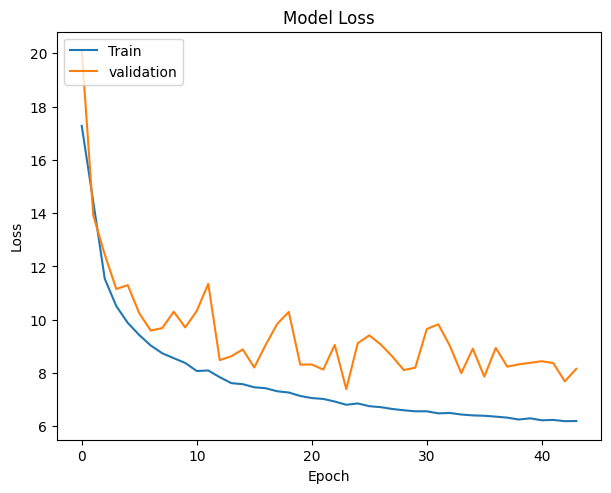

In [57]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend(['Train','validation'],loc='upper left')

plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1,right=0.95)
plt.show()

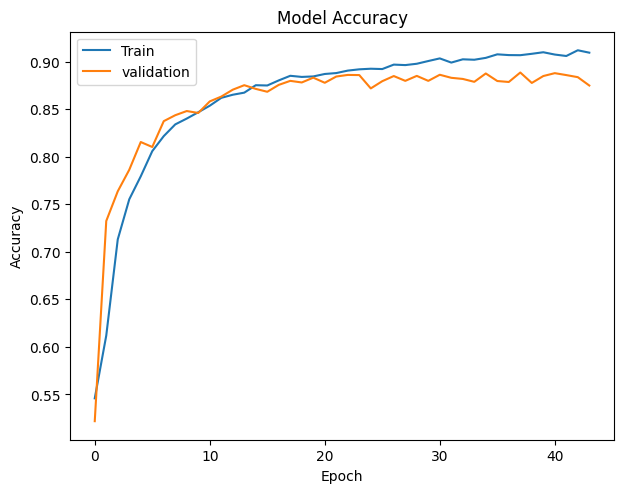

In [58]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','validation'],loc='upper left')

plt.subplots_adjust(top=0.95,bottom=0.1,left=0.1,right=0.95)
plt.show()

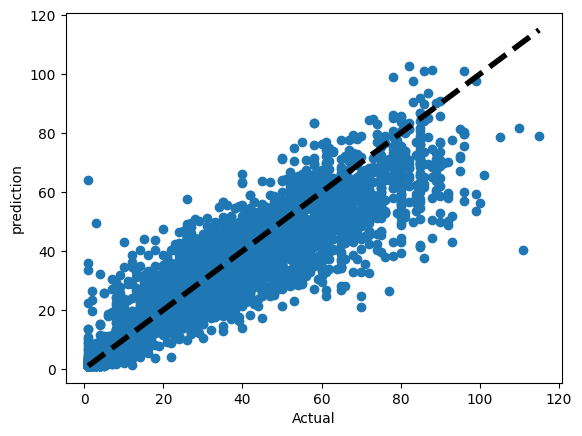

In [59]:
fig,ax=plt.subplots()
ax.scatter(Y_test2[1],pred[1])
ax.plot([Y_test2[1].min(),Y_test2[1].max()],[Y_test2[1].min(),Y_test2[1].max()],'k--',lw=4)

plt.xlabel("Actual")
plt.ylabel("prediction")
plt.show()

In [60]:
i=0
pred_l=[]
while i<len(pred[0]):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

report=classification_report(Y_test2[0],pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3093
           1       0.88      0.88      0.88      2833

    accuracy                           0.89      5926
   macro avg       0.89      0.89      0.89      5926
weighted avg       0.89      0.89      0.89      5926



In [62]:
!pip install seaborn

<AxesSubplot:>

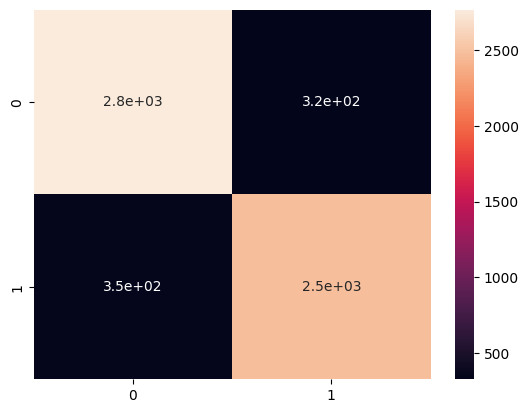

In [63]:
result=confusion_matrix(Y_test2[0],pred_l)  
import seaborn as sns
sns.heatmap(result,annot=True)

## Tesing The Model

In [64]:
def testing(index,images_arr,images_arr1,model_instance):
    plt.imshow(images_arr[index])
    image_test=images_arr1[index]
    pre=model_instance.predict(np.array([image_test]))
    gender=['Male','Female']
    age=int(np.round(pre[1][0]))
    sex=int(np.round(pre[0][0]))
    print("Predict Age "+ str(age))
    print("Predict Gender "+ gender[sex])

1/1 [==============================] - 0s 33ms/step
Predict Age 17
Predict Gender Male


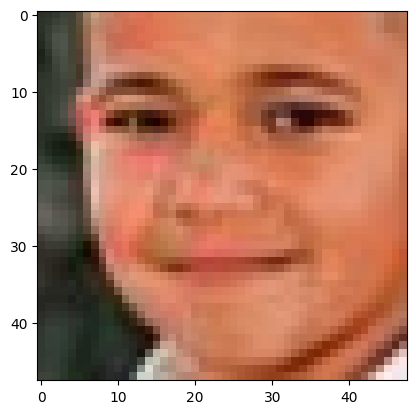

In [65]:
testing(83,images_arr,images_arr1,model_instance)